In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install -U seaborn


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [2]:
import  pandas as pd
import numpy as np
# import psycopg2

# from src.data.db_conn import load_db_table
# from config.config import get_project_root
# import subprocess
# import sys
# import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
 
# from config.config import config

In [3]:
# conn = psycopg2.connect(
#     host= "localhost",
#     database= "suppliers",
#     user= "postgres",
#     password= "8800464987",
#     port = "5432")


<!-- Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack
 -->

df= pd.read_csv('heart.csv')
df.head()

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Age : Age of the patient
    
# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type
#     Value 1: typical angina
#     Value 2: atypical angina
#     Value 3: non-anginal pain
#     Value 4: asymptomatic
        
# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results
#     Value 0: normal
#     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#     thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
## Renaming the columns with their actual names for some better understanding.

In [77]:
df.rename(columns = {'cp' : 'chest_pain_type', 'trtbps':'resting_blood_pressure' , 'fbs': 'fasting_blood_pressure',  'restecg': 'resting_electrocardiographic_results',  'thalachh': 'maximum_heart_rate_ach', 'chol':'cholestrol_in_mg',  'exng':'exercise_induced_angina',  }, inplace=True)
df.head()

,age,sex,Chest_pain_type,resting_blood_pressure,Cholestrol_in_mg,Fasting_blood_pressure,Resting_electrocardiographic_results,Maximum_heart_rate_ach,Exercise_induced_angina,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain_type              303 non-null    int64  
 3   trtbps                       303 non-null    int64  
 4   cholestrol_mg                303 non-null    int64  
 5   fasting_blood_pressure       303 non-null    int64  
 6   resting_electrocard_results  303 non-null    int64  
 7   maximum_heart_rate_ach.      303 non-null    int64  
 8   exercise_induced_angina      303 non-null    int64  
 9   oldpeak                      303 non-null    float64
 10  slp                          303 non-null    int64  
 11  caa                          303 non-null    int64  
 12  maximum_hear_rate_ach.       303 non-null    int64  
 13  output              

In [97]:
df.select_dtypes(include=['float64']).copy()


,oldpeak
0,2.3
1,3.5
2,1.4
3,0.8
4,0.6
...,...
298,0.2
299,1.2
300,3.4
301,1.2


In [98]:
df.describe()

,age,sex,Chest_pain_type,trtbps,Cholestrol_in_mg,Fasting_blood_pressure,Resting_electrocardiographic_results,Maximum_heart_rate_ach.,Exercise_induced_angina,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

In [35]:
df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
trtbps                         0
cholestrol_mg                  0
fasting_blood_pressure         0
resting_electrocard_results    0
maximum_heart_rate_ach.        0
exercise_induced_angina        0
oldpeak                        0
slp                            0
caa                            0
maximum_hear_rate_ach.         0
output                         0
dtype: int64

In [38]:
df['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain_type              303 non-null    int64  
 3   trtbps                       303 non-null    int64  
 4   cholestrol_mg                303 non-null    int64  
 5   fasting_blood_pressure       303 non-null    int64  
 6   resting_electrocard_results  303 non-null    int64  
 7   maximum_heart_rate_ach.      303 non-null    int64  
 8   exercise_induced_angina      303 non-null    int64  
 9   oldpeak                      303 non-null    float64
 10  slp                          303 non-null    int64  
 11  caa                          303 non-null    int64  
 12  maximum_hear_rate_ach.       303 non-null    int64  
 13  output              

In [40]:
df[df.duplicated()]

,age,sex,chest_pain_type,trtbps,cholestrol_mg,fasting_blood_pressure,resting_electrocard_results,maximum_heart_rate_ach.,exercise_induced_angina,oldpeak,slp,caa,maximum_hear_rate_ach.,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [41]:
for i in list(df.columns):
    print ("{} -- {}".format(i, df[i].value_counts().shape[0]))
    

age -- 41
sex -- 2
chest_pain_type -- 4
trtbps -- 49
cholestrol_mg -- 152
fasting_blood_pressure -- 2
resting_electrocard_results -- 3
maximum_heart_rate_ach. -- 91
exercise_induced_angina -- 2
oldpeak -- 40
slp -- 3
caa -- 5
maximum_hear_rate_ach. -- 4
output -- 2


In [5]:

## Categorical Variables
categorical  = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'] 
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldspeak', 'output']


,age,sex,chest_pain_type,trtbps,cholestrol_mg,fasting_blood_pressure,resting_electrocard_results,maximum_heart_rate_ach.,exercise_induced_angina,oldpeak,slp,caa,maximum_hear_rate_ach.,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


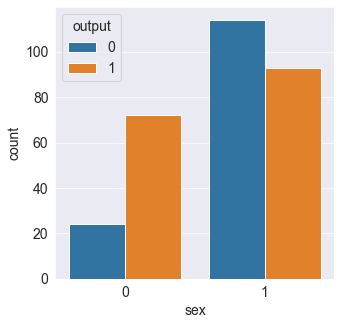

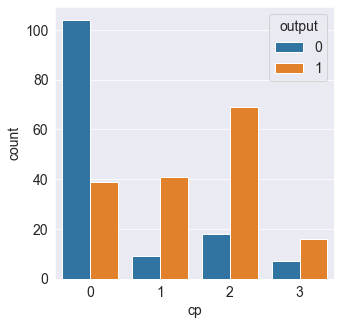

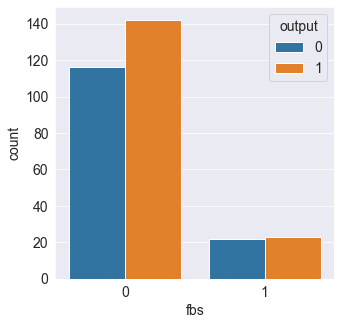

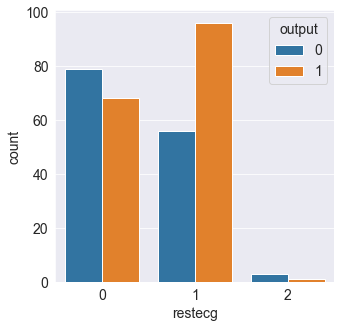

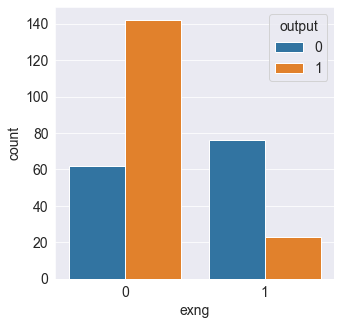

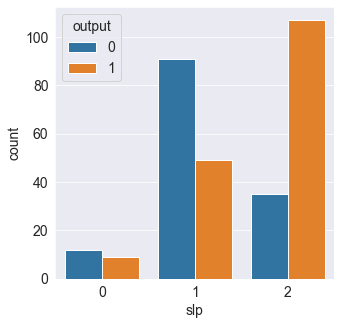

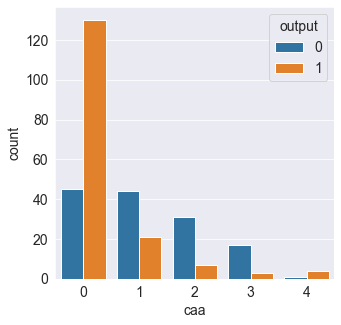

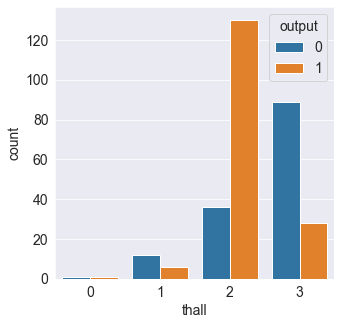

In [16]:


for i in categorical:
    plt.figure(figsize = (5,5))
#     sns.set_theme(style='darkgrid')
    sns.countplot(x=i, data =df, hue="output")

C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 360x144 with 0 Axes>

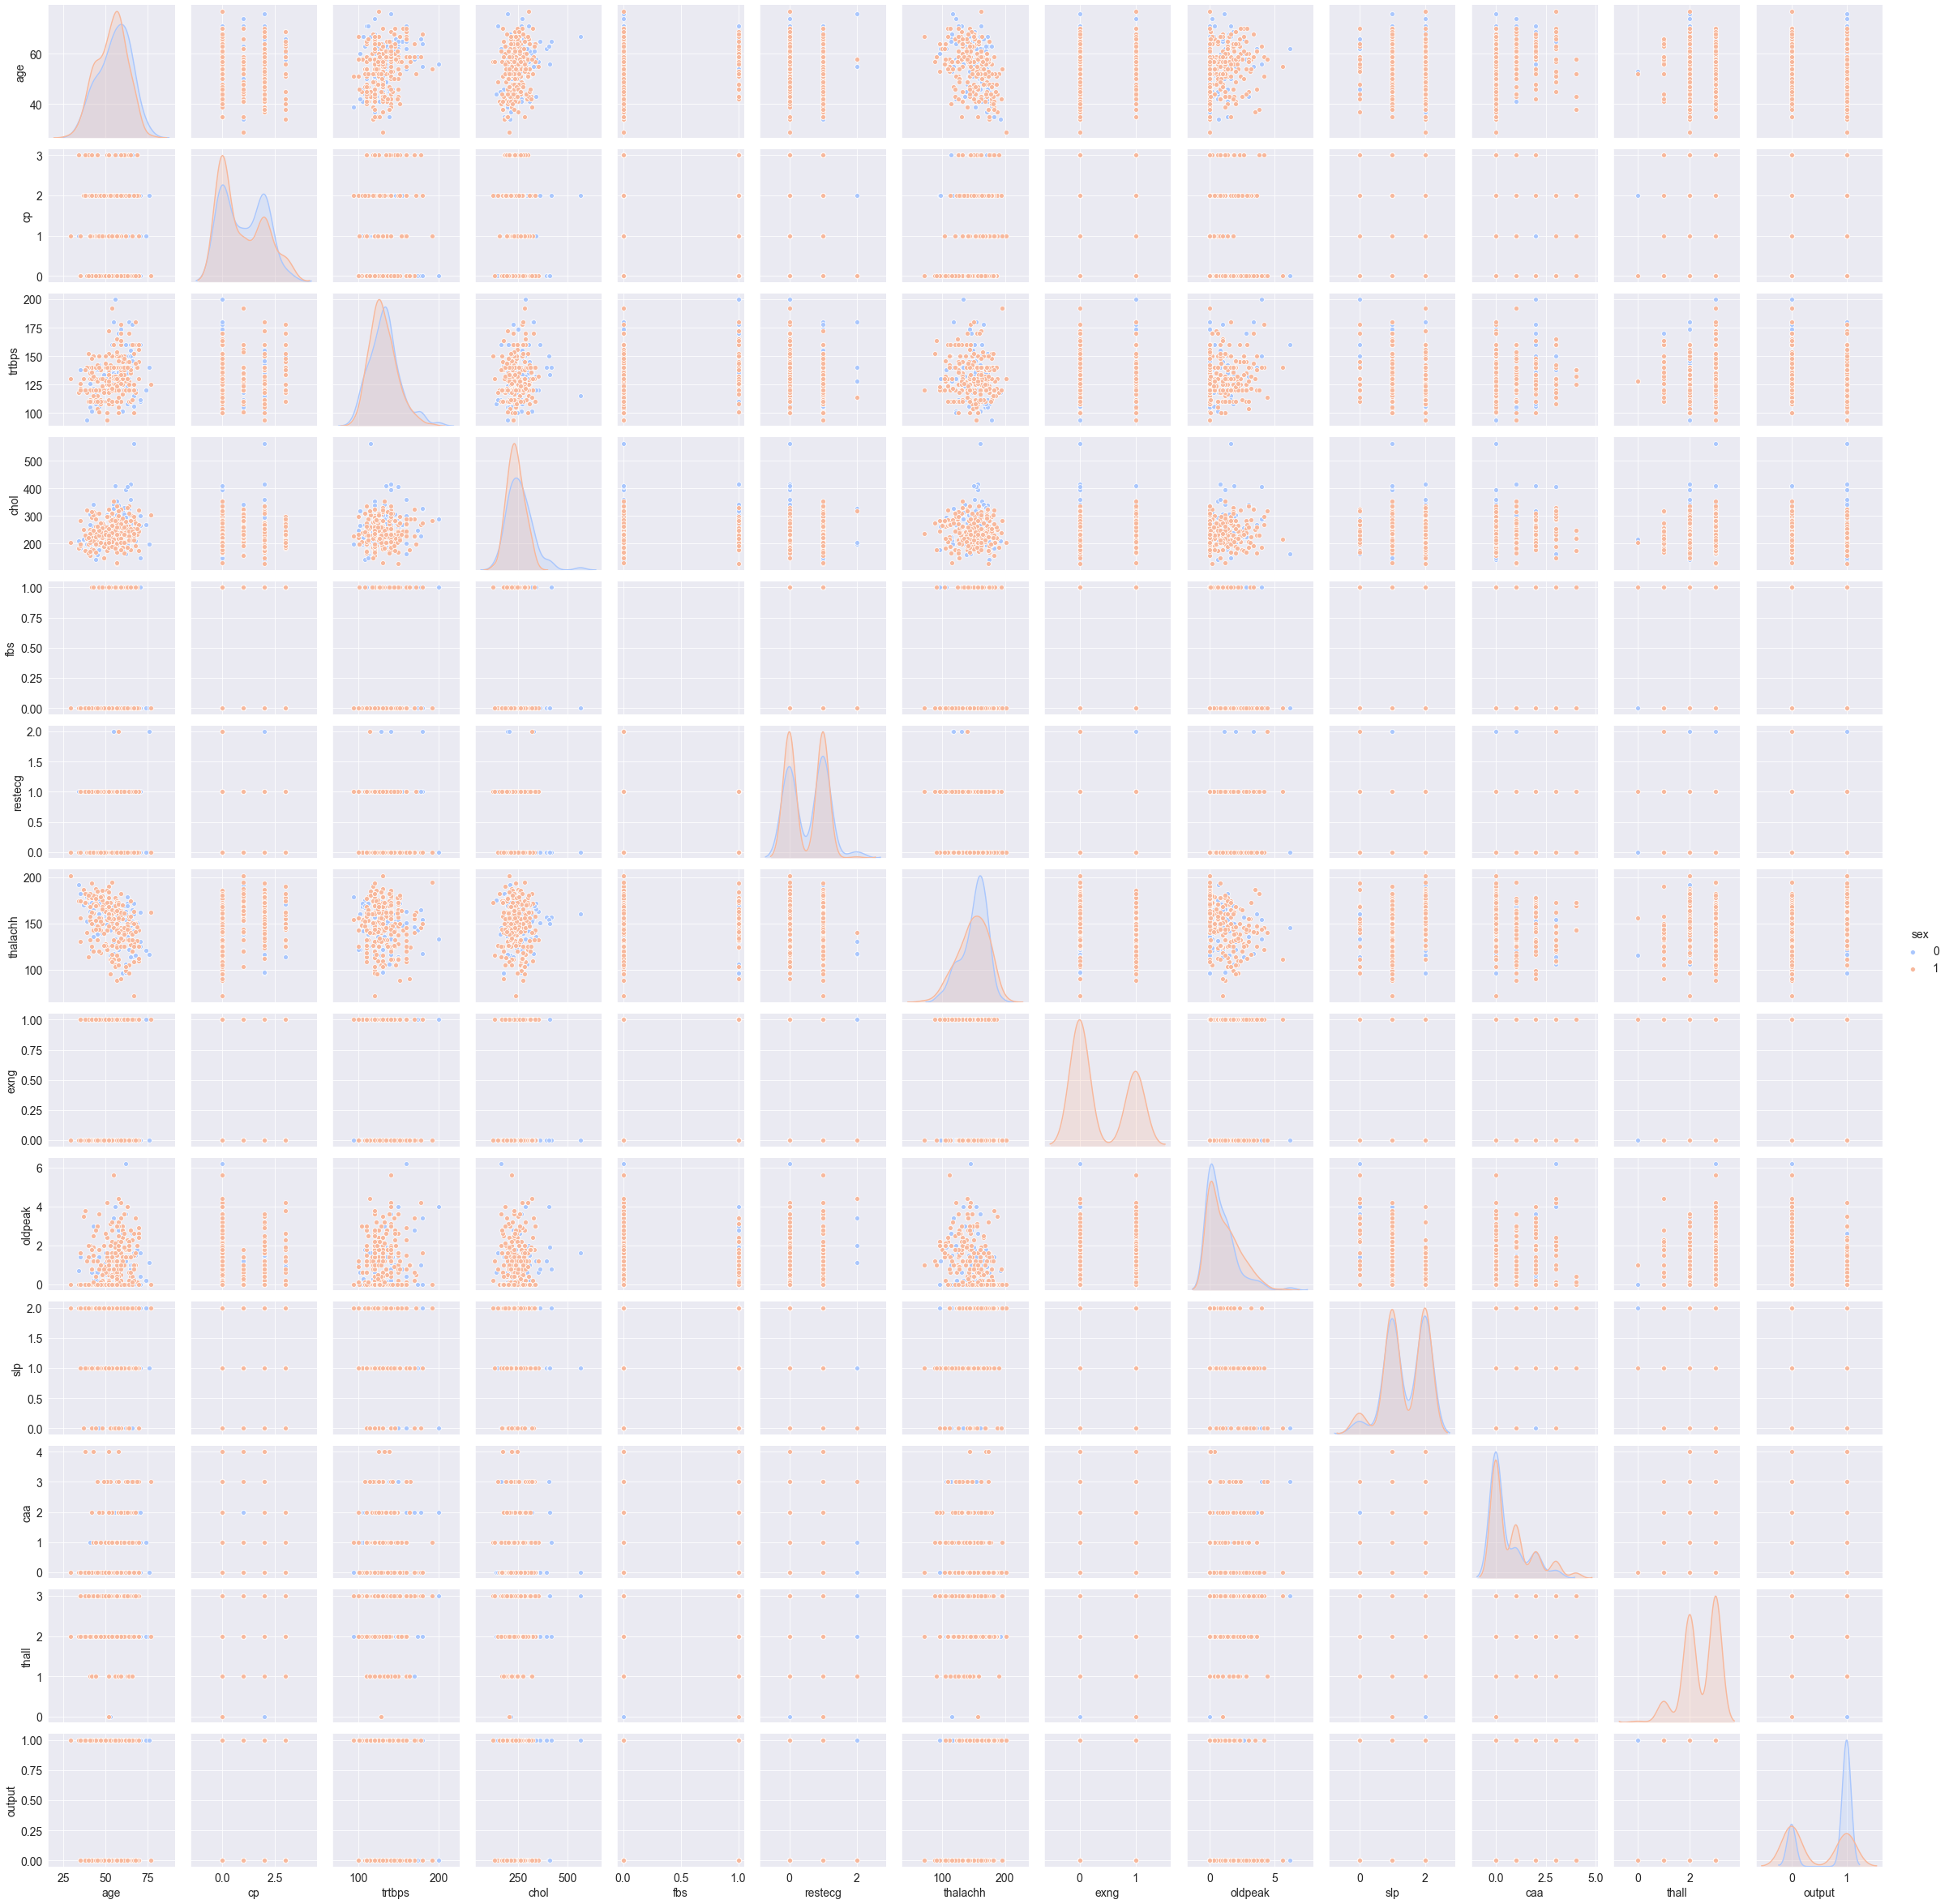

In [21]:
plt.figure(figsize=(5,2))
sns.pairplot(df,hue = 's', palette='coolwarm') 

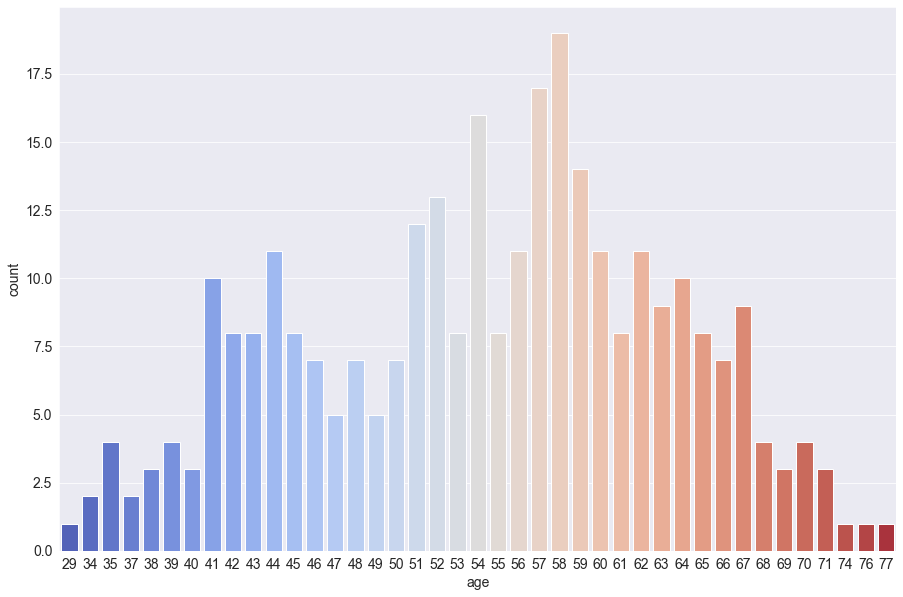

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df['age'], palette='coolwarm')

In [ ]:
# The above countplot shows that the age bracket of 50 -70 has the highest chances of heart disease.

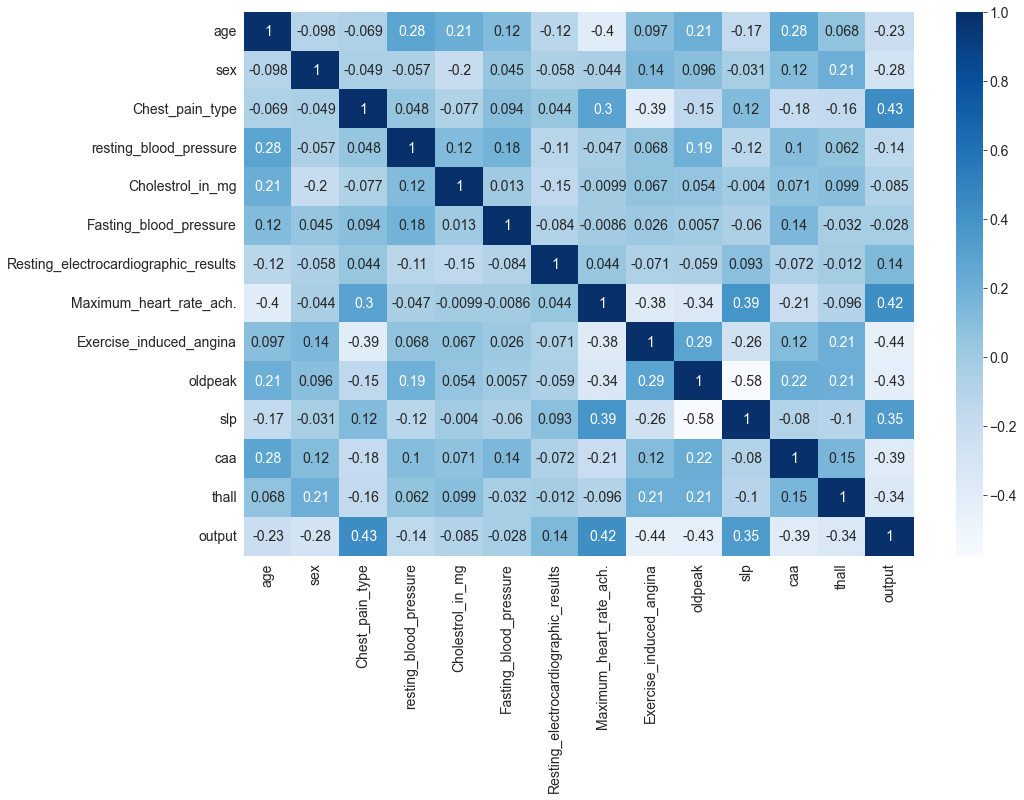

In [21]:
# A correlation matrix is like a summary of the dataset and its variables, which helps in understanding their relation with one another.

corr = df.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, cmap='Blues', annot=True)

In [ ]:
## FINDINGS FROM THE COORELATION MATRIX:

  -# Sex & Age are highly Negatively correlated = -0.92.   
  -# Max.heart_Rate acheived is positively related with slp = 0.39
  -# Max.heart_Rate is Negatively correlated with Age = -0.4
  -# trtbps is positively correlated with age= 0.28
  -# age is positively correlated with cholestrol_in_mg= 0.21
  -# Max.heart_Rate achieved Positively related with chest_pain_type= 0.3
  -# Excerise_induced_angina is negatively correlated with chest_pain & High_heart_rate = -0.39 & -0.38 resp.

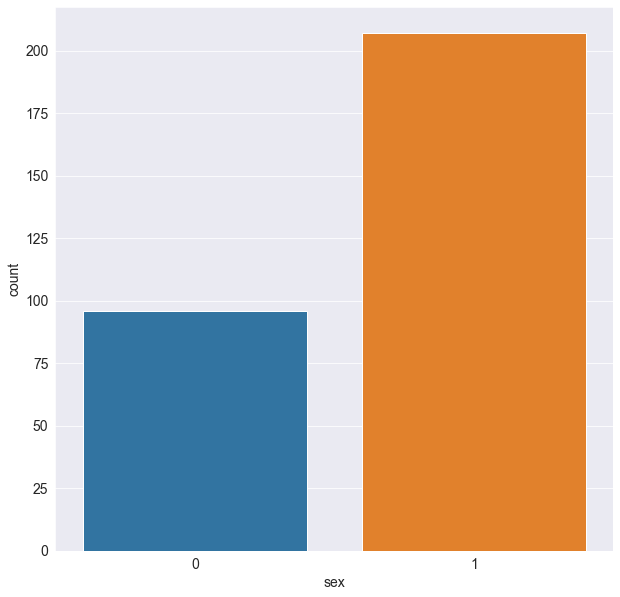

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='sex')

In [ ]:
# 0: Female
# 1: Male    

##the histplot for age and sex helps in understanding count of Males are much higher than Females, so clearly this won't be a fair representation of Females health issues wih age.

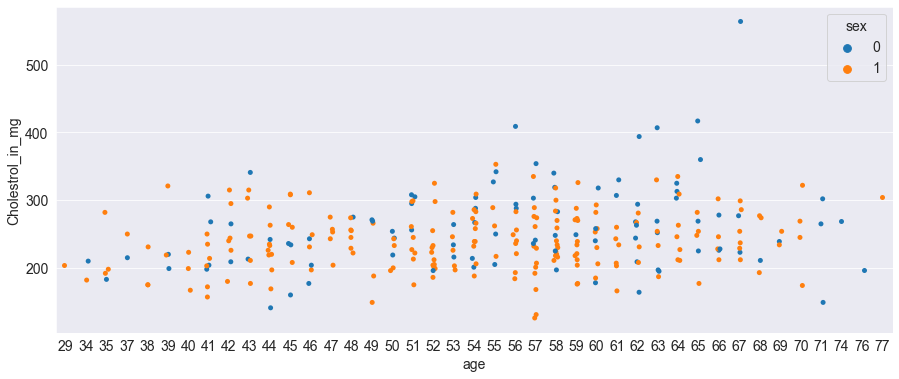

In [73]:
plt.figure(figsize=(15,6))
sns.stripplot(data=df, y=df['Cholestrol_in_mg'], x=df['age'], hue='sex')


In [76]:
# 0 = Female
# 1 = Male
#the striplot plot shows that the levels of cholestrol are higher with age in Females more compared to males.

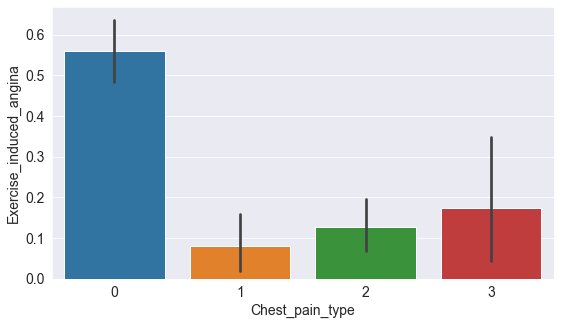

In [36]:
sns.barplot(y=df['Exercise_induced_angina'], x=df['Chest_pain_type'])

In [ ]:
# Chest pain type 0 i.e., 'Typical chest pain' is associated with high rate of exercie_induced_angina

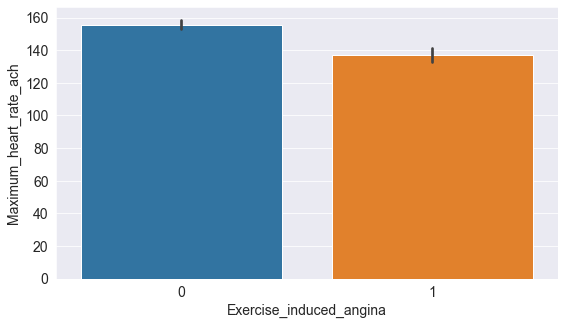

In [43]:
sns.barplot(x=df['Exercise_induced_angina'], y=df['Maximum_heart_rate_ach'])

In [ ]:
## Clearly the bar plot shows that Maximum_heart_rate is associated with excercise_induced_angina.

# Exercise_induced_angina
## 1 - Yes
## 0 - No
 

Observations after analysing the data with categorical & numerical features with respect to sex, age, medical conditions etc.
the following resuts can help us understand and lead us to some meaningful results 

In [ ]:


## the age bracket of 50 -70 has the highest chances of heart disease

## the histplot for age and sex helps in understanding count of Males are much higher than Females, so clearly this won't be a fair representation of Females health issues wih age.

# the striplot plot shows that the levels of cholestrol are higher with age in Females more compared to males.

# Chest pain type 0 i.e., 'Typical chest pain' is associated with high rate of exercie_induced_angina

## Clearly the bar plot shows that Maximum_heart_rate is associated with excercise_induced_angina.





